In [1]:
#importing tensorflow
import tensorflow as tf

In [2]:
#importing sequencial model
from tensorflow.keras.models import Sequential
#importing CNN layers
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
#importing Augmenting library
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#importing others library to store and show data
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Mouting google drive to access data 
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    print("Mounted With Google Drive")
    COLAB = True
    %tensorflow_version 2.x
except:
    COLAB = False

Mounted at /content/drive
Mounted With Google Drive
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [4]:
#We have stored data in My drive/Dataset folder
DATA_PATH = '/content/drive/MyDrive/boby/dataset'

In [5]:
#Our test and train directory have specified below
train_dir = '/content/drive/MyDrive/boby/dataset/Train'
validation_dir ='/content/drive/MyDrive/boby/dataset/Test'

In [6]:
train_Fresh_dir = '/content/drive/MyDrive/boby/dataset/Train/Fresh'
train_Rotten_dir =  '/content/drive/MyDrive/boby/dataset/Train/Rotten'
validation_Fresh_dir = '/content/drive/MyDrive/boby/dataset/Test/Fresh'
validation_Rotten_dir = '/content/drive/MyDrive/boby/dataset/Test/Rotten'

In [7]:
#Configuring the dataset

#Batch size is 10(Will take 10 image for each run)
batch_size = 10
#Epoch is 50(Will run 50times)
epochs = 5
#Image height and width reduced here for faster train and test
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [8]:
#Normalizing the train and test generator for our model
train_image_generator = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 

In [9]:
#Creating Train Data Generator with the selected configuration
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 10901 images belonging to 2 classes.


In [10]:
#Creating Test Data Generator with the selected configuration
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2698 images belonging to 2 classes.


In [11]:
#Storing train_data_generator into simple_training_images
sample_training_images, _ = next(train_data_gen)

In [12]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

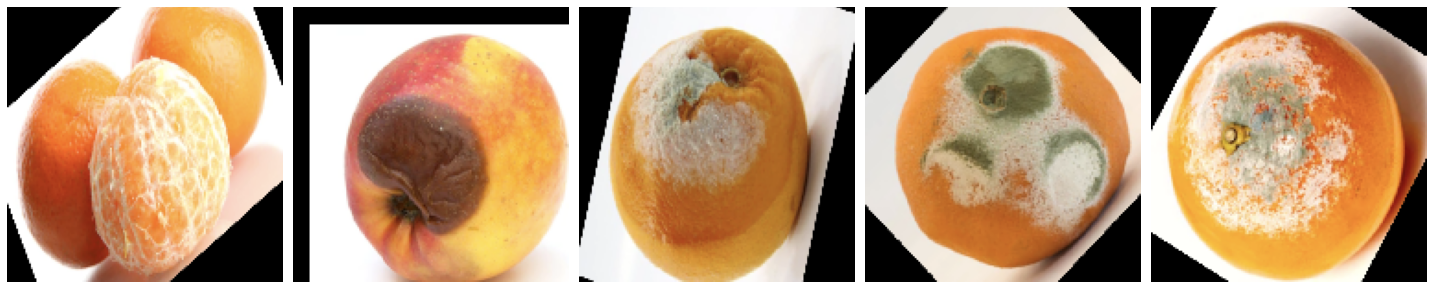

In [13]:
#Showing Training images including fresh and rotten
plotImages(sample_training_images[:10])

In [14]:
#Creating our main CNN model to augment images
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),

    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation='relu'),
    
    Dense(1)
])

In [15]:
#Adding ADAM optimizer to optimize output
model.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
#Printing Model Summery
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [ ]:
#Training our model with 50 epoch
history = model.fit_generator(
    train_data_gen,
    #steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    #validation_steps=total_val // batch_size
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
1091/1091 [==============================] - ETA: 0s - loss: 0.2974 - accuracy: 0.8611

In [ ]:
#Showing accuracy and loss graph
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Basic Augmentation
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True,vertical_flip=True)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [ ]:
plotImages(augmented_images)

In [ ]:
#Variation 3
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True,vertical_flip=True,samplewise_center=True,samplewise_std_normalization=True)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(10)]

In [ ]:
plotImages(augmented_images)

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [ ]:
plotImages(augmented_images)

In [ ]:
#Variation 2
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True,vertical_flip=True)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(10)]

In [ ]:
plotImages(augmented_images)

In [ ]:
#Variation 4
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True,vertical_flip=True,samplewise_center=True,fill_mode='nearest',featurewise_center=True,samplewise_std_normalization=True)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(10)]

In [ ]:
plotImages(augmented_images)